In [242]:
import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3
import sqlalchemy
import json
import requests
import matplotlib.pyplot as plt

In [243]:
#open and read file
df = pd.read_csv("c:/Users/fearn/Downloads/Jobs_NYC_Postings.csv")
pd.set_option('display.max_columns', None)

In [ ]:
#Rename FT/PT columns for easier calculations
df =df.rename(columns={'Full-Time/Part-Time indicator': 'FT/PT'})

#Create new column to hold Base Salary Calculations
df['Base Salary'] = 0

#Calculate Daily salary rate to yearly, and copy Annual as yearly
df.loc[df['Salary Frequency'] == 'Daily', 'Base Salary'] = round(df['Salary Range From'].mul(210), 2)
df.loc[df['Salary Frequency'] == 'Annual', 'Base Salary'] = round(df['Salary Range From'], 2)

#calculate Base Salary for Hourly Employees dependent on their FT/PT Status
df['Base Salary'] = np.where((df['FT/PT'] == 'P') & (df['Salary Frequency'] == 'Hourly') , round(df['Salary Range From'].mul(20*52), 2), df['Base Salary'])
df['Base Salary'] = np.where((df['FT/PT'] == 'F') & (df['Salary Frequency'] == 'Hourly') , round(df['Salary Range From'].mul(40*52), 2), df['Base Salary'])

#move Base Salary column to desired location in table
column_to_move = df.pop("Base Salary")  
df.insert(12, "Annual Base Salary", column_to_move) 

In [245]:
#Drop unnecessary columns
df = df.drop(['Title Classification', 'Title Code No', 'Salary Range To', 'Salary Range From', 'Salary Frequency', 'Hours/Shift', 'Post Until', 'Posting Updated', 'Process Date'], axis=1)
df = df.drop(['Preferred Skills', 'Additional Information', 'To Apply', 'Recruitment Contact', 'Work Location 1', 'Job Description'], axis=1)

In [246]:
#rename columns for query managability 
df =df.rename(columns={'FT/PT': 'Ft_Pt', 'Minimum Qual Requirements' : 'Min_qual', 'Job ID' : 'Job_id', '# Of Positions' : 'Num_pos'})
df =df.rename(columns={'Business Title': 'Business_title', 'Civil Service Title' : 'Civil_title', 'Job Category' : 'Category', 'Career Level' : 'Career_level'})
df =df.rename(columns={'Posting Type': 'Posting_type', 'Annual Base Salary' : 'Yearly_salary', 'Work Location' : 'Location', 'Division/Work Unit' : 'Division'})
df =df.rename(columns={'Residency Requirement': 'Res_req', 'Posting Date' : 'Post_Date'})

In [247]:
#create local database
engine = create_engine('sqlite:///CAPSTONE_db.db')
df.to_sql('NYC_job_postings', con=engine, index=False, if_exists='replace')

5481

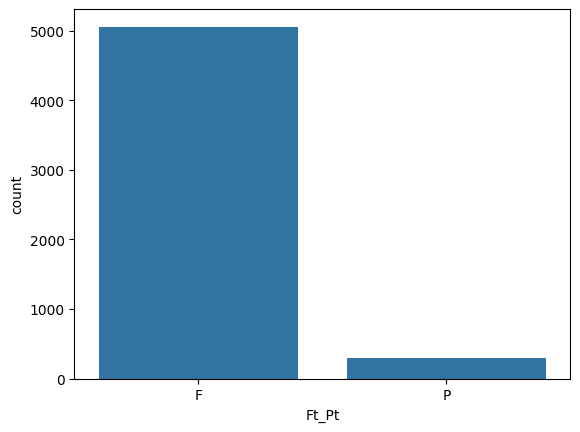

In [239]:
sns.countplot(x='Ft_Pt', data=df)
plt.show()

In [240]:

conn.row_factory = sqlite3.Row

rows = conn.execute(f"SELECT * FROM NYC_job_postings WHERE Level = '00'")   


for row in rows:
    print(f'\n {dict(row)} \n')


 {'Job_id': 589025, 'Agency': 'DEPARTMENT OF TRANSPORTATION', 'Posting_type': 'External', 'Num_pos': 2, 'Business_title': 'Supervisor Highway Repairer', 'Civil_title': 'SUPERVISOR HIGHWAY REPAIRER', 'Level': '00', 'Category': 'Building Operations & Maintenance', 'Ft_Pt': 'F', 'Career_level': 'Experienced (non-manager)', 'Yearly_salary': 83932.8, 'Location': '55 Water St Ny Ny', 'Division': 'Preventive Maintenance', 'Min_qual': 'Qualification Requirements    Three years of full-time satisfactory experience as a working member of a roadway maintenance and repair crew using asphalt and concrete mixes, at least one year of which must have been in a supervisory capacity.    License Requirement    At the time of appointment, candidates must possess a Class B Commercial Driver License valid in the State of New York, valid for air brakes. Employees must maintain this license for the duration of employment.', 'Res_req': 'New York City residency is generally required within 90 days of appointme

In [146]:
# url = 'https://data.cityofnewyork.us/resource/kpav-sd4t.json'

# # Fetch JSON data from the URL
# response = requests.get(url)
# data = response.json()

# # Create DataFrame from JSON data
# df = pd.DataFrame(data)

# # Convert DataFrame to JSON string
# json_data = df.to_json()